In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from typing import Tuple

In [11]:
def find_clusters(
    image: np.ndarray, val_range: Tuple[float, float], min_cluster_size: int = 20
) -> np.ndarray:
    """
    Find clusters of pixels within a specified value range in a grayscale image and draw rough circles around them.

    Parameters:
    - image: Grayscale image as a NumPy array.
    - val_range: Tuple specifying the min and max pixel values to consider as a cluster.
    - min_cluster_size: Minimum number of pixels to be considered a cluster.

    Returns:
    - output_image: Image with clusters roughly circled.
    """

    # Convert the image to float32 if not already
    if image.dtype != np.float32:
        image = np.array(image, dtype=np.float32)

    # Create binary mask for the range
    mask = cv2.inRange(image, val_range[0], val_range[1])

    # Find clusters
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    # Copy the original image to draw circles on it
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Filter out small clusters and draw circles:
    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] >= min_cluster_size:
            cluster_coords = np.column_stack(np.where(labels == label))

            # Calculate the centroid of the cluster
            centroid_x, centroid_y = centroids[label]

            # Calculate a rough radius based on the cluster size
            radius = int(np.sqrt(stats[label, cv2.CC_STAT_AREA] / np.pi)) + 5

            # Draw a circle around the cluster
            cv2.circle(
                output_image, (int(centroid_x), int(centroid_y)), radius, (0, 0, 255), 2
            )

    return output_image

In [13]:
IMAGES_PATH = "../outputs/Transfer-Learning/gen-2"
IMAGES = os.listdir(IMAGES_PATH)
RANGE = [0, 0.1]
MIN_CLUSTER_SIZE = 20

In [18]:
cluster_data = dict()

for image_name in tqdm(IMAGES, desc="Processing Images"):
    image_path = os.path.join(IMAGES_PATH, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clusters = find_clusters(image, RANGE, MIN_CLUSTER_SIZE)
    cluster_data[image_name] = (image, clusters)

Processing Images: 100%|██████████| 654/654 [00:00<00:00, 1332.72it/s]


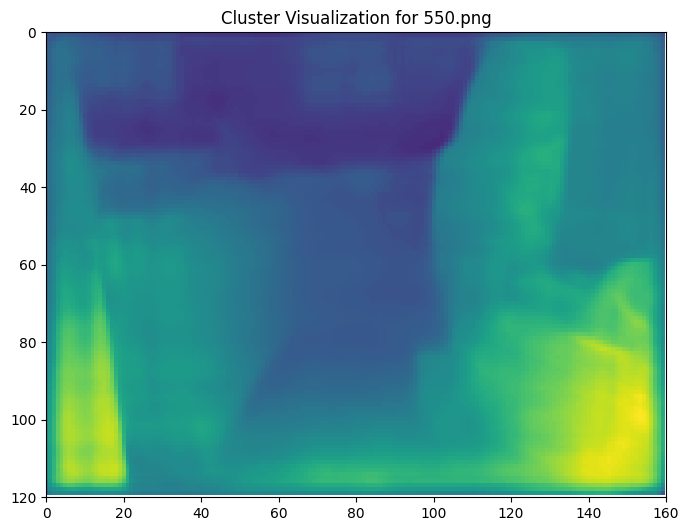

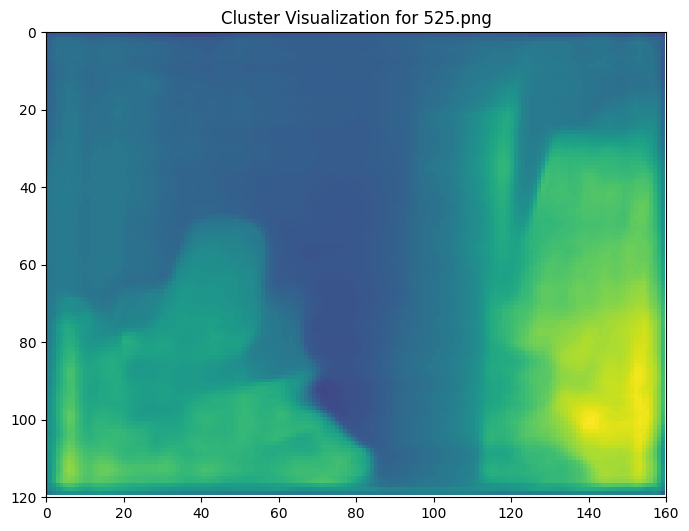

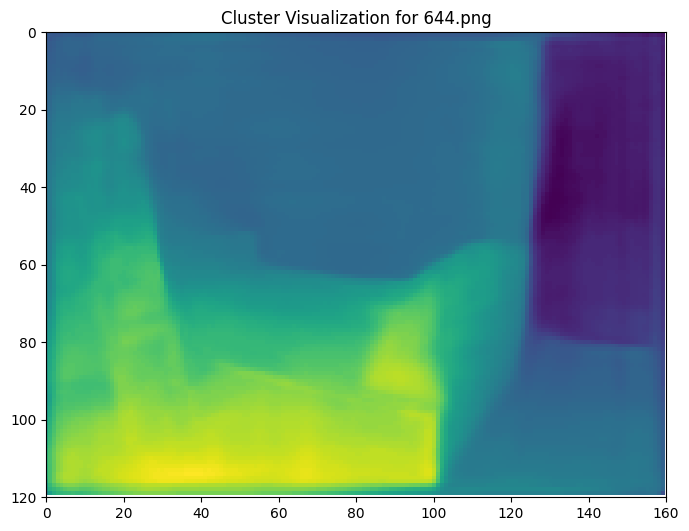

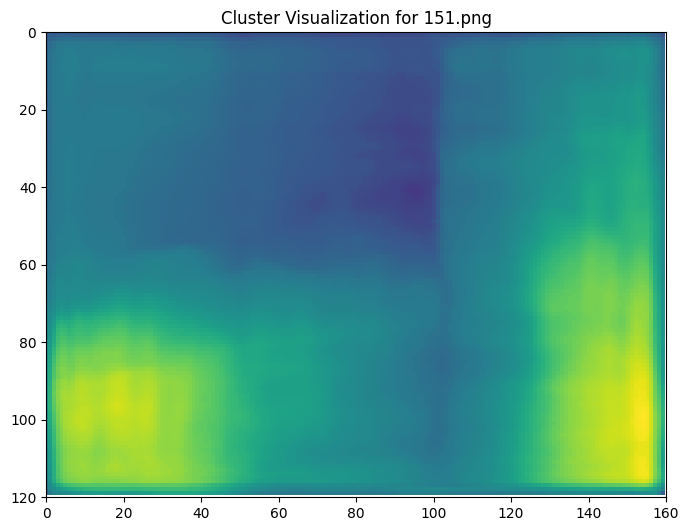

In [26]:
for i, (name, (image, clusters)) in enumerate(cluster_data.items()):
    if i == 4:
        break

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="viridis", origin="upper")

    # Set limits to match the image dimensions
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)  # y-axis is reversed in imshow

    for cluster in clusters:
        x_coords, y_coords = cluster[:, 1], cluster[:, 0]
        plt.scatter(
            x_coords, y_coords, s=15, c="red", alpha=1
        )  # s: marker size, c: color

    plt.title(f"Cluster Visualization for {name}")
    plt.show()